In [1]:
import requests
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup

c:\Users\USER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Information required Average Rank, Film, and Year
url = 'https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films'

In [3]:
# I have to create this in my machine:
db_name = 'Movies.db'
table_name = 'Top_50'

In [4]:
# Path to csv that will hold the data
csv_path = r'C:\Users\USER\Desktop\Learning\DataEngCourse\Web_Scraping_Lesson\output_data.csv'

In [6]:
# We set counter to 0 because we only need top 50, there might be mroe in the website
count = 0

In [7]:
# Getting the html from the website that we will parse
r = requests.get(url).text

In [8]:
# Creating the beautiful soup object
soup = BeautifulSoup(r, 'html.parser')

Using the inspect feature in the browser we can analyze the html

When doing that, we can notice that the table is inside the <tbody> tag

Each row is inside the <tr> row and each element inside the row is in the <th> tag

So we need a for loop inside another loop to get this data

In [36]:
# To get all the rows inside the table we need to use the method find_all 
# This gets you the table
tables = soup.find_all('tbody')

# This gets you the rows
rows = tables[0].find_all('tr')

In [132]:
# creating dataframe to hold requiered info
df = pd.DataFrame(columns=["Average Rank","Film","Year"])

# Loop the rows <tr> to find each <td> and get the requiered data
# Assuming 'rows' is a list of <tr> elements
count = 0
for row in rows:
    if count<50:
        col = row.find_all('td')
        if len(col)!=0:
            data_dict = {"Average Rank": col[0].contents[0],
                         "Film": col[1].contents[0],
                         "Year": col[2].contents[0]}
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df,df1], ignore_index=True)
            count+=1
    else:
        break

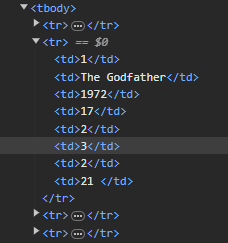

In [135]:
df

,Average Rank,Film,Year
0,1,The Godfather,1972
1,2,Citizen Kane,1941
2,3,Casablanca,1942
3,4,"The Godfather, Part II",1974
4,5,Singin' in the Rain,1952
5,6,Psycho,1960
6,7,Rear Window,1954
7,8,Apocalypse Now,1979
8,9,2001: A Space Odyssey,1968
9,10,Seven Samurai,1954


In [136]:
df.to_csv(csv_path)

In [137]:
# To store the required data in a database, you first need to initialize a connection to the database, save the dataframe as a table, and then close the connection. This can be done using the following code:
conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()

In [ ]:
'''
Try the following practice problems to test your understanding of the lab. Please note that the solutions for the following are not shared. You are encouraged to use the discussion forums in case you need help.

Modify the code to extract Film, Year, and Rotten Tomatoes' Top 100 headers.

Restrict the results to only the top 25 entries.

Filter the output to print only the films released in the 2000s (year 2000 included).
'''